# LIBRERIAS

In [68]:
# Librerias EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
import numpy as np
import json
from pickle import dump

# Librerias ML

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

# PASO 1: Planteamiento del problema y Recopilación de Datos.

-PLANTEAMIENTO DEL PROBLEMA:

- Queremos predecir la prima que deberá asumir el cliente para contratar un seguro médico.


-RECOPILACION DE DATOS:

In [69]:
#Recopilamos datos
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")

#Además, vamos a guardarlo en el repositorio por seguridad.
raw_data_backup = data.to_csv("../data/raw/raw_data.csv", sep=";")

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# PASO 2: Exploración y Limpieza de Datos.

- Obtener dimensiones del dataset

In [70]:
#Obtenemos dimensiones del dataset
data.shape

(1338, 7)

- Obtener informacion sobre tipos de datos y valores nulos.

In [71]:
#Obtenemos informacion sobre los tipos de datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [72]:
#Obtenemos info sobre valores nulos

data.isna().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

-CONCLUSIONES:

- Dimensiones: 1338, 7
- Valores nulos: Sin valores nulos.
- Tipo de datos: 4 campos numéricos y 3 campos categoricos.

- Eliminacion de Duplicados

In [73]:
#Funcion para eliminar duplicados

#Columna identificadora del Dataset.
#id = "id" En este caso no es necesario porque no hay un identificador en el dataset

def EraseDuplicates(dataset):
    older_shape = dataset.shape
    if (dataset.duplicated().sum()):
        print(f"Total number of duplicates {dataset.duplicated().sum()}")
        print ("Erase duplicates...")
        dataset.drop_duplicates(inplace = True)
    else:
        print ("No coincidences.")
        pass
    
    print (f"The older dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    
    return dataset

EraseDuplicates(data)

data

Total number of duplicates 1
Erase duplicates...
The older dimension of dataset is (1338, 7), and the new dimension is (1337, 7).


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- Eliminacion de datos irrelevantes.

In [74]:
#Funcion para eliminar datos irrelevantes.

#irrelevant_lst = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

def EraseIrrelevants(dataset, lst):
    older_shape = data.shape
    print("Erase irrelevant´s dates...")
    dataset.drop(lst, axis = 1, inplace = True)
    print (f"The old dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    return dataset

#EraseIrrelevants(data, irrelevant_lst)

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


-CRITERIOS DE ELIMINACION

- En este caso considero todos los predictores lo suficientemente relacionados con el target como para eliminarlos.

# PASO 3: Analisis de variables univariantes

- Analisis sobre variables categóricas

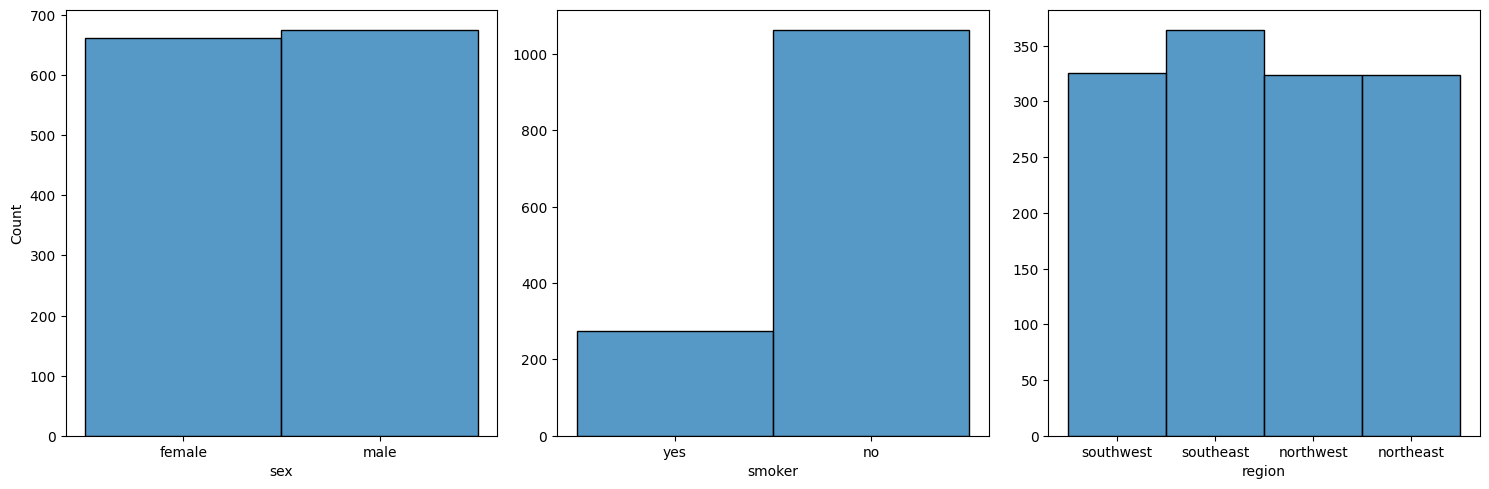

In [75]:
# Analisis sobre variables categoricas

def CategoricGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(1, 3, figsize=(15,5))

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0], data = dataset, x = "sex")
    sns.histplot( ax = axis[1], data = dataset, x = "smoker").set(ylabel = None)
    sns.histplot( ax = axis[2], data = dataset, x = "region").set(ylabel = None)
   

    #Mostramos el grafico.
    plt.tight_layout()
    plt.show()

CategoricGraf(data)

-CONCLUSIONES:

- Sex: Hay un numero similar de mujeres y hombres.
. Smoker: La mayoría de la muestra es no fumadora.
- Region: Aunque hay un pequeño despunte en la muestra a favor de la región del sudeste la cantidad de muestra con las demás regiones es muy similar.

- Analisis sobre variables numéricas

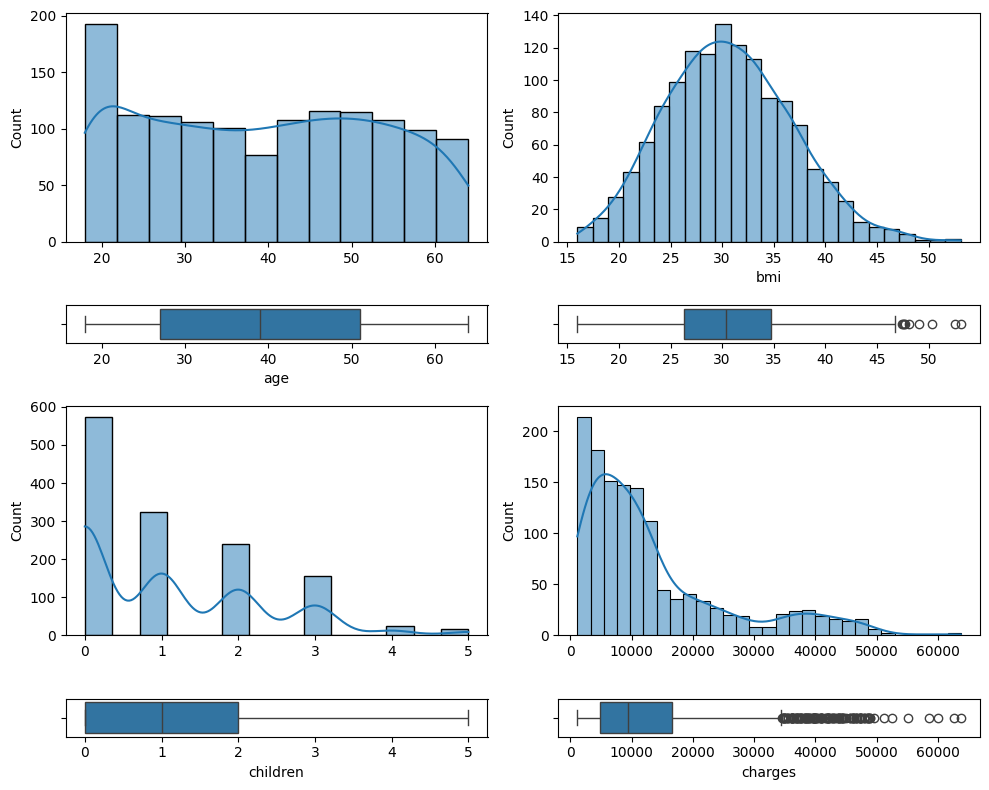

In [76]:
# Analisis sobre variables numericas

def NumericalGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(4, 2, figsize=(10,8), gridspec_kw={"height_ratios" : [6,1,6,1]})

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0,0], data = dataset, x = "age", kde = True).set(xlabel = None)
    sns.boxplot( ax = axis[1,0], data = dataset, x = "age")
    sns.histplot( ax = axis[0,1], data = dataset, x = "bmi", kde = True)
    sns.boxplot( ax = axis[1,1], data = dataset, x = "bmi").set(xlabel = None)
    sns.histplot( ax = axis[2,0], data = dataset, x = "children", kde = True).set(xlabel = None)
    sns.boxplot ( ax = axis[3,0], data = dataset, x = "children")
    sns.histplot ( ax = axis[2,1], data = dataset, x = "charges", kde = True).set(xlabel = None)
    sns.boxplot ( ax = axis[3,1], data = dataset, x = "charges")
    
    plt.tight_layout()
    plt.show()

NumericalGraf(data)

-CONCLUSIONES

- Age: La media de edad es de 38 años.

- BMI: El Indice de Masas Corporal media es de 31, es decir, obesidad de tipo 1.

- Children: La mayoría de la muestra no tiene hijos.

- Charges: Es la Target, la media es de 9500.

# PASO 4: Analisis de variable multivariante

- Analisis Charges (age - bmi - children) numérico/numérico

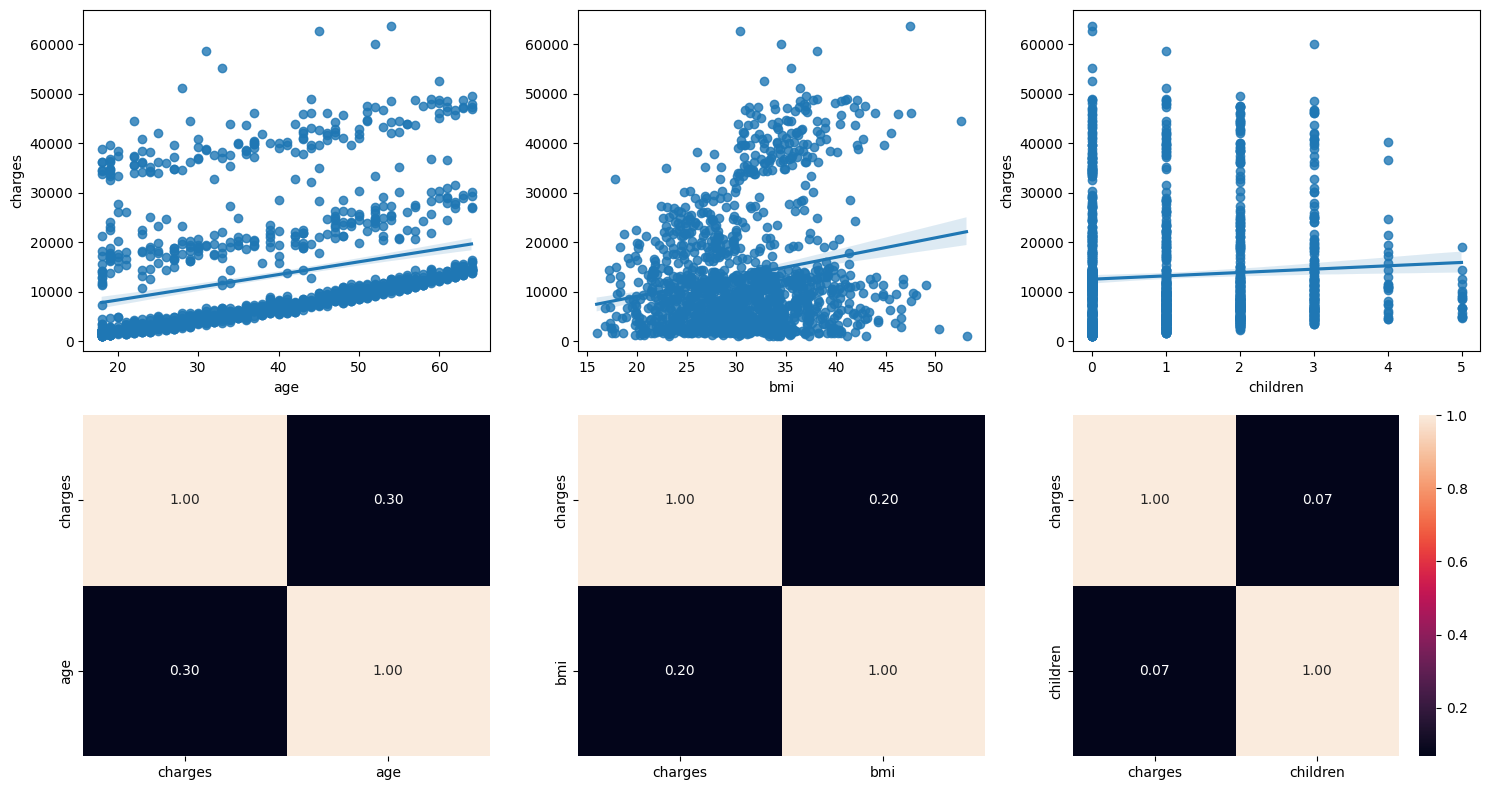

<Figure size 640x480 with 0 Axes>

In [77]:
#Analisis numerico/numerico

def NumNumAnalysi(dataset, y, x_list):
    #Creamos la figura
    fig, axis = plt.subplots(2, 3, figsize=(15,8))

    #Creamos la grafica
    sns.regplot( ax = axis[0,0], data = dataset, x = x_list[0], y = y)
    sns.heatmap( data[[y,x_list[0]]].corr(), annot=True, fmt=".2f", ax = axis[1,0], cbar=False)
    sns.regplot ( ax = axis[0,1], data = dataset, x = x_list[1], y = y).set(ylabel = None)
    sns.heatmap( data[[y, x_list[1]]].corr(), annot=True, fmt = ".2f", ax = axis[1,1], cbar=False)
    sns.regplot( ax = axis[0,2], data = dataset, x = x_list[2], y = y)
    sns.heatmap( data[[y, x_list[2]]].corr(), annot=True, fmt = ".2f", ax = axis[1,2])

    plt.tight_layout()
    plt.show()

    plt.tight_layout()
    plt.show()

NumNumAnalysi(data, "charges", ["age", "bmi", "children"])

##### CONCLUSIONES:

- Charges/Age: Son los datos más correlacionados. Contra más años tiene más prima tiene que pagar.

- Charges/BMI: También tiene una correlacion significante, a mayor IMC más tiene que pagar.

- Charges/Children: Aunque hay una correlación menor a más hijos más tiene que pagar el cliente.

##### Analisis Categórico/Categórico

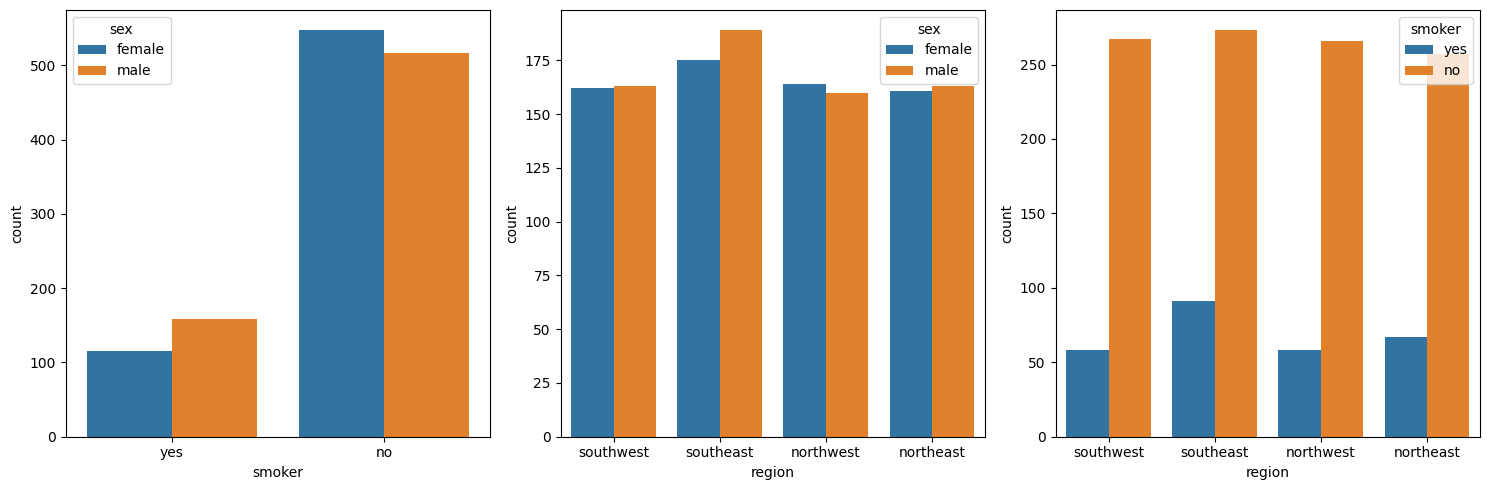

In [78]:
#Analisis categorico/categorico

def CatCatAnalysi(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(1, 3, figsize=(15,5))

    #Creamos las graficas.
    sns.countplot(ax = axis[0], data = dataset, x = "smoker", hue = "sex")
    sns.countplot(ax = axis[1], data = dataset, x = "region", hue="sex")
    sns.countplot(ax = axis[2], data = dataset, x = "region", hue="smoker")


    plt.tight_layout()
    plt.show()

CatCatAnalysi(data)

##### CONCLUSIONES:

- Smoker: La mayoría de fumadores son hombres.

- Region: En el sudeste hay más hombres que mujeres y, de hecho, es la region donde más se fuma.

- Por los datos que estamos viendo hasta ahora parece que los hombres van a pagar más prima que las mujeres, vamos a comprobarlo.

##### Combinación Target / Predictors

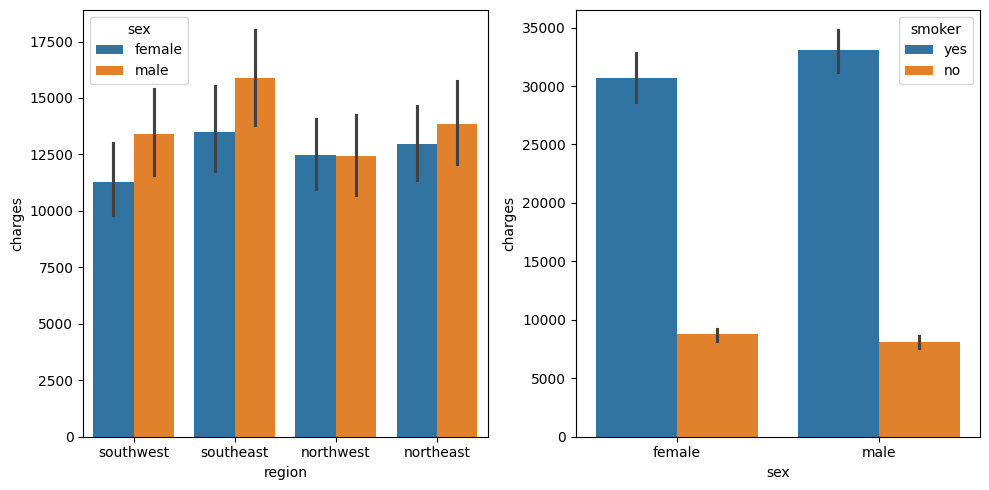

In [79]:
#Combinación Target/Pred

def CombTargPred(dataset):
    
    fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

    sns.barplot(ax = axis[0], data = dataset, x = "region", y = "charges", hue = "sex")
    sns.barplot(ax = axis[1], data = dataset, x = "sex", y = "charges", hue = "smoker")

    plt.tight_layout()
    plt.show()

CombTargPred(data)

#### CONCLUSIONES:

- En efecto ser los hombres en el sudeste son los que más pagan, y los fumadores pagan mucho más que los no fumadores.

- Codificamos las variables categoricas

In [80]:
#Convertimos las columnas categoricas al Dtype category para optimizar los datos.

def ObjectToCategory(dataset, col):
    dataset[col] = dataset[col].astype("category")
    return dataset


ObjectToCategory(data, "sex")
ObjectToCategory(data, "smoker")
ObjectToCategory(data, "region")


data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


In [81]:
#Vamos a factorizar las variables categoricas -esta vez sin OHE.-

def Factorized(dataset, col):

    factorize = pd.factorize(dataset[col])
    parsin_dic = {}
    index = factorize[1]
    factor = list(set(factorize[0]))
    for i in range (len(factorize[1])):
        parsin_dic.update({index[i] : int(factor[i])})
    
    with open (f"../data/interim/{col}_parsing.json", "w") as j:
        json.dump(parsin_dic, j)
    
    dataset[col] = factorize[0]
    
    return dataset

Factorized(data, "sex")
Factorized(data, "smoker")
Factorized(data, "region")


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


### Creamos la tabla de correlaciones

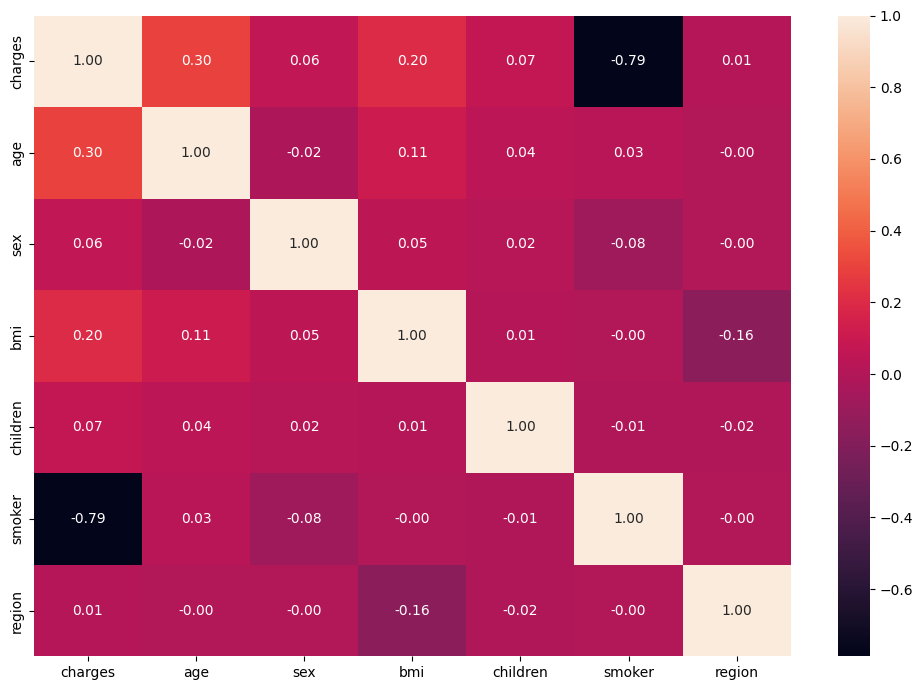

In [82]:
#Tabla de correlaciones
fig, axis = plt.subplots(figsize=(10,7))

sns.heatmap(data[["charges", "age", "sex", "bmi", "children", "smoker", "region"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

##### PRIMERAS CONCLUSIONES:

- La prima esta fuertemente relacionada con el predictor fumador.

- También está relacionada con el BMI y la edad.

- Hay cierta relacion del BMI con la region.

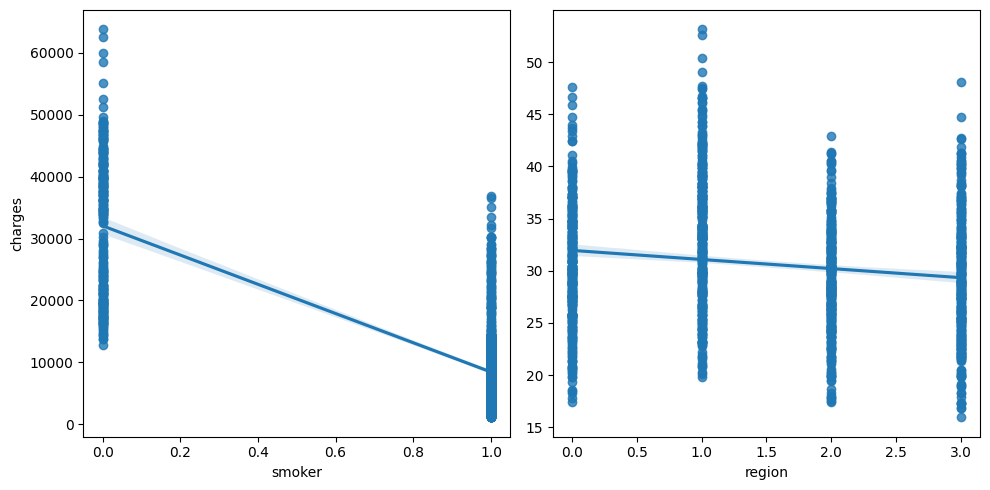

In [83]:
#Corroboración de la tabla
fig, axis = plt.subplots(1,2,figsize=(10,5))

sns.regplot(ax = axis[0], data = data, x = "smoker", y = "charges")
sns.regplot(ax = axis[1], data = data, x = "region", y = "bmi").set(ylabel = None)

plt.tight_layout()
plt.show()

- Corroboramos que la prima sube si los clientes fuman.

- La relación entre región y bmi no es tan importante como pensaba en primer momento.

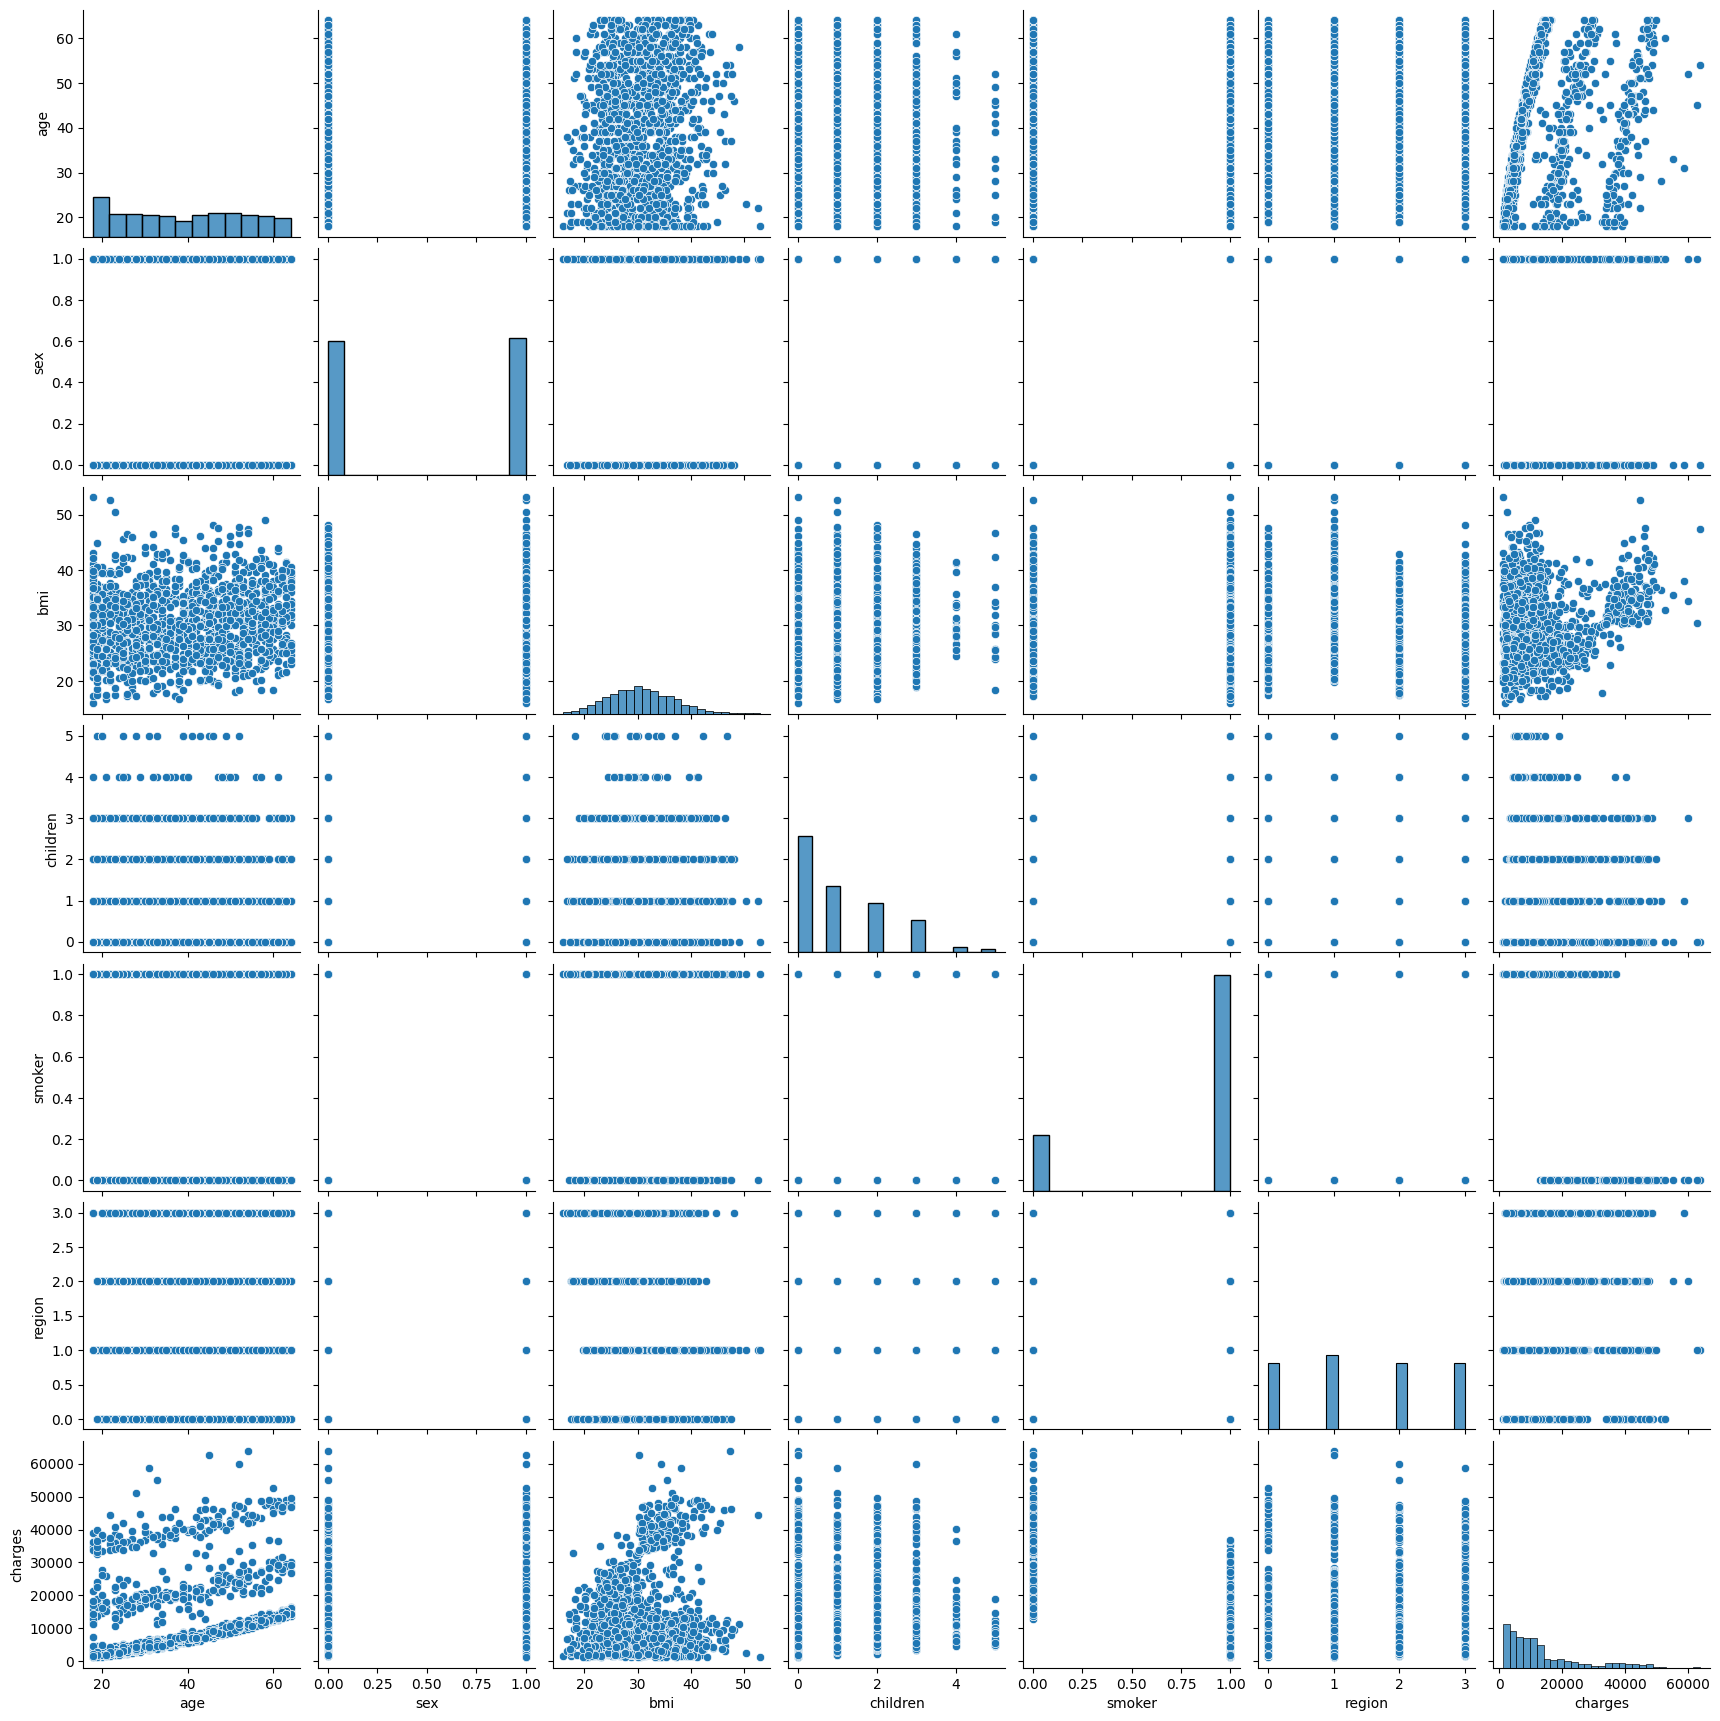

In [84]:
sns.pairplot(data)

# PASO 5: ingeniería de características.

- Analisis de Outliers

In [85]:
# Comprobamos las metricas de la tabla.

data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


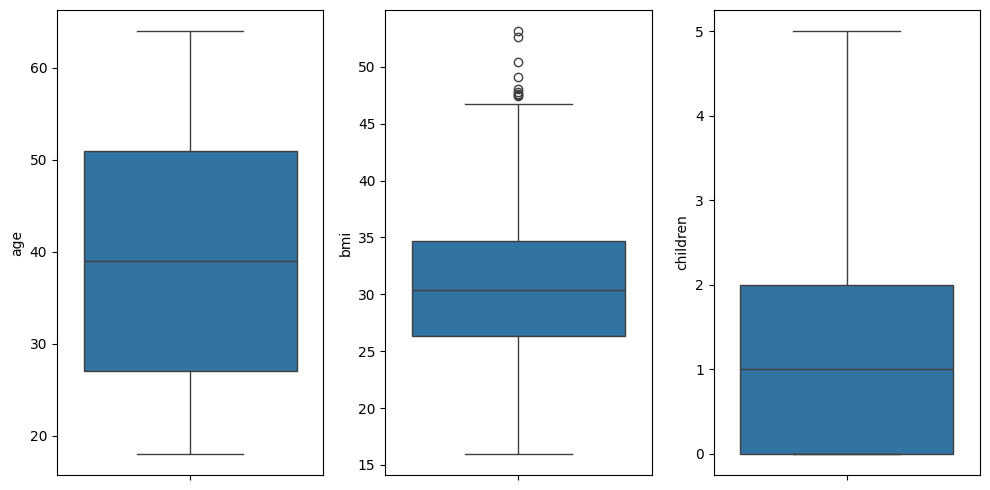

In [86]:
#Grafica de outliers

fig, axis = plt.subplots(1, 3, figsize=(10,5))

sns.boxplot( ax = axis [0], data = data, y = "age")
sns.boxplot( ax = axis [1], data = data, y = "bmi")
sns.boxplot( ax = axis [2], data = data, y = "children")

plt.tight_layout()
plt.show()

In [87]:
#Hacemos dos copias del dataset, una para el dataset con outliers y otra sin.

data_with_outliers = data.copy()
data_without_outliers = data.copy()

#Creamos una funcion para transformar los outliers.

def TransOutliers(dataset, col_outliers):
    stats = dataset[col_outliers].describe()
    
    #Establecemos los límites.
    # Los valores óptimos para sumarle al Q3 suelen ser 1.5*IQR, 1.75*IQR y 2*IQR.
    iqr = stats["75%"] - stats["25%"]
    upper_limit = float(stats["75%"] + (2 * iqr))
    lower_limit = float(stats["25%"] - (2 * iqr))
    
    if (lower_limit < 0):
        lower_limit = 0

    #Ajustamos el outlier por encima.
    dataset[col_outliers] = dataset[col_outliers].apply(lambda x : upper_limit if (x > upper_limit) else x)

    #Ajustamos el outlier por debajo.
    dataset[col_outliers] = dataset[col_outliers].apply(lambda x : lower_limit if (x < lower_limit) else x)

    #Guardamos los límites en un json.

    with open (f"../data/interim/outerliers_{col_outliers}.json", "w") as j:
        json.dump({"upper_limit" : upper_limit, "lower_limit" : lower_limit}, j)

    return dataset

TransOutliers (data_without_outliers, "age")
TransOutliers (data_without_outliers, "bmi")
TransOutliers (data_without_outliers, "children")

data_without_outliers

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


- Analisis de valores faltantes.

In [88]:
#Comprobamos si existen valores faltantes.

data_with_outliers.isna().sum().sort_values()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [89]:
data_without_outliers.isna().sum().sort_values()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

En este caso no hay valores faltantes

- Inferencia de Nuevas características.

In [90]:
#Inferencias de nuevas características.

En este caso no veo razones para crear nuevas características.

- Escalado de Valores

In [91]:
# Primero dividimos los dataframes entre test y train

features = ["age","sex", "bmi", "children", "smoker", "region"]
target_feature = ["charges"]

def SplitData (dataset, num_features, target):
    x = dataset.drop(target, axis = 1)[num_features]
    y = dataset[target].squeeze()

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

    return x_train, x_test, y_train, y_test

x_train_with_outliers, x_test_with_outliers, y_train, y_test = SplitData(data_with_outliers, features, target_feature)
x_train_without_outliers, x_test_without_outliers,_, _ = SplitData(data_without_outliers, features, target_feature)

y_train.to_csv("../data/processed/y_train.csv")
y_test.to_csv("../data/processed/y_test.csv")

In [92]:
#Tenemos que escalar los dataset con Normalizacion y con Escala mM (min-Max)

#Normalizacion
def StandardScaleData(dataset, num_features):
    scaler = StandardScaler()
    scaler.fit(dataset)

    x_scaler = scaler.transform(dataset)
    x_scaler = pd.DataFrame(dataset, index = dataset.index, columns = num_features)
    
    if(dataset is x_train_with_outliers):
        dump(scaler, open("../data/interim/standar_scale_with_outliers.sav", "wb"))

    elif(dataset is x_train_without_outliers):
        dump(scaler, open("../data/interim/standar_scale_without_outliers.sav", "wb"))

    return x_scaler

x_train_with_outliers_standarscale = StandardScaleData(x_train_with_outliers, features)
x_train_without_outliers_standarscale = StandardScaleData(x_train_without_outliers,features)
x_test_with_outliers_standscale = StandardScaleData(x_test_with_outliers, features)
x_test_without_outliers_standscale = StandardScaleData(x_test_without_outliers, features)

In [93]:
#Escala mM
def MinMaxScaleData(dataset, num_features):
    scaler = MinMaxScaler()
    scaler.fit(dataset)

    x_scaler = scaler.transform(dataset)
    x_scaler = pd.DataFrame(dataset, index = dataset.index, columns = num_features)

    if(dataset is x_train_with_outliers):
        dump(scaler, open("../data/interim/min-Max_Scale_with_outliers.sav", "wb"))

    elif(dataset is x_train_without_outliers):
        dump(scaler, open("../data/interim/min-Max_Scale_without_outliers.sav", "wb"))

    return x_scaler

x_train_with_outliers_mMScaler = MinMaxScaleData(x_train_with_outliers, features)
x_train_without_outliers_mMScaler = MinMaxScaleData(x_train_without_outliers,features)
x_test_with_outliers_mMScaler = MinMaxScaleData(x_test_with_outliers, features)
x_test_without_outliers_mMScaler = MinMaxScaleData(x_test_without_outliers, features)

# PASO 6: Selección de caracteristicas

In [94]:
#Seleccion de caracteristicas
k = 4
def SelectFeatures(dataset, y, filename, k = k):
    sel_model = SelectKBest(f_classif, k=k)
    sel_model.fit(dataset, y)
    col_name = sel_model.get_support()
    x_sel = pd.DataFrame(sel_model.transform(dataset), columns = dataset.columns.values[col_name])
    dump(sel_model, open(f"../data/interim/{filename}.sav", "wb"))
    return x_sel

In [95]:
#Dataset sin normalizacion
x_train_sel_with_outliers = SelectFeatures(x_train_with_outliers, y_train, "x_train_with_outliers")
x_test_sel_with_outliers = SelectFeatures(x_test_with_outliers, y_test, "x_test_with_outliers")
x_train_sel_without_outliers = SelectFeatures(x_train_without_outliers, y_train, "x_train_without_outliers")
x_test_sel_without_outliers = SelectFeatures(x_test_without_outliers, y_test, "x_test_without_outliers")

#Dataset Normalizado
x_train_sel_with_outliers_standarscale = SelectFeatures(x_train_with_outliers_standarscale, y_train, "x_train_with_outliers_standarscale")
x_test_sel_with_outliers_standarscale = SelectFeatures(x_test_with_outliers_standscale, y_test, "x_test_with_outliers_standscale")
x_train_sel_without_outliers_standarscale = SelectFeatures(x_train_without_outliers_standarscale, y_train, "x_train_sel_without_outliers_standarscale")
x_test_sel_without_outliers_standarscale = SelectFeatures(x_test_without_outliers_standscale, y_test, "x_test_without_outliers_standscale")

#Dataset Escalado min-Max
x_train_sel_with_outliers_mMScale = SelectFeatures(x_train_with_outliers_mMScaler, y_train, "x_test_with_outliers_mMScaler")
x_test_sel_with_outliers_mMScale = SelectFeatures(x_test_with_outliers_mMScaler, y_test, "x_test_with_outliers_mMScaler")
x_train_sel_without_outliers_mMScale = SelectFeatures(x_train_without_outliers_mMScaler, y_train, "x_train_without_outliers_mMScaler")
x_test_sel_without_outliers_mMScale = SelectFeatures(x_test_with_outliers_mMScaler, y_test, "x_test_with_outliers_mMScaler")

c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in

In [96]:
x_test_sel_without_outliers_standarscale

,bmi,children,smoker,region
0,22.515,0.0,1.0,3.0
1,25.600,4.0,1.0,0.0
2,36.385,3.0,1.0,2.0
3,34.390,3.0,0.0,2.0
4,38.390,2.0,1.0,1.0
...,...,...,...,...
263,40.480,0.0,1.0,1.0
264,36.300,0.0,1.0,1.0
265,34.580,2.0,1.0,3.0
266,36.300,1.0,0.0,0.0


In [97]:
#Para acabara añadimos el target a los datasets.

target = "charges"
def AgreeTarget(dataset, y, target = target):
    dataset[target] = list(y) #Si no le pones el list le pasa los indices y se crear valores NaN
    return dataset

AgreeTarget(x_train_sel_with_outliers, y_train)
AgreeTarget(x_test_sel_with_outliers, y_test)
AgreeTarget(x_train_sel_without_outliers, y_train)
AgreeTarget(x_test_sel_without_outliers, y_test)
AgreeTarget(x_train_sel_with_outliers_standarscale, y_train)
AgreeTarget(x_test_sel_with_outliers_standarscale, y_test)
AgreeTarget(x_train_sel_without_outliers_standarscale, y_train)
AgreeTarget(x_test_sel_without_outliers_standarscale, y_test)
AgreeTarget(x_train_sel_with_outliers_mMScale, y_train)
AgreeTarget(x_test_sel_with_outliers_mMScale, y_test)
AgreeTarget(x_train_sel_without_outliers_mMScale, y_train)
AgreeTarget(x_test_sel_without_outliers_mMScale, y_test)

,bmi,children,smoker,region,charges
0,22.515,0.0,1.0,3.0,8688.85885
1,25.600,4.0,1.0,0.0,5708.86700
2,36.385,3.0,1.0,2.0,11436.73815
3,34.390,3.0,0.0,2.0,38746.35510
4,38.390,2.0,1.0,1.0,4463.20510
...,...,...,...,...,...
263,40.480,0.0,1.0,1.0,13831.11520
264,36.300,0.0,1.0,1.0,13887.20400
265,34.580,2.0,1.0,3.0,3925.75820
266,36.300,1.0,0.0,0.0,47403.88000


In [98]:
#Para acabar nos guardamos los datasets en un csv

def DataToCsv(dataset, filename):
    return dataset.to_csv(f"../data/processed/{filename}.csv")

DataToCsv(x_train_sel_with_outliers, "x_train_sel_with_outliers")
DataToCsv(x_test_sel_with_outliers, "x_test_sel_with_outliers")
DataToCsv(x_train_sel_without_outliers, "x_train_sel_without_outliers")
DataToCsv(x_test_sel_without_outliers, "x_test_sel_without_outliers")
DataToCsv(x_train_sel_with_outliers_standarscale, "x_train_sel_with_outliers_standarscale")
DataToCsv(x_test_sel_with_outliers_standarscale, "x_test_sel_with_outliers_standarscale")
DataToCsv(x_train_sel_without_outliers_standarscale, "x_train_sel_without_outliers_standarscale")
DataToCsv(x_test_sel_without_outliers_standarscale, "x_test_sel_without_outliers_standarscale")
DataToCsv(x_train_sel_with_outliers_mMScale, "x_train_sel_with_outliers_mMScale")
DataToCsv(x_test_sel_with_outliers_mMScale, "x_test_sel_with_outliers_mMScale")
DataToCsv(x_train_sel_without_outliers_mMScale, "x_train_sel_without_outliers_mMScale")
DataToCsv(x_test_sel_without_outliers_mMScale, "x_test_sel_without_outliers_mMScale")

y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
760      3925.75820
1284    47403.88000
1285     8534.67180
Name: charges, Length: 268, dtype: float64

# ESTO YA NO ES PARTE DEL EDA

# Machine Learning

In [99]:
traindfs = [x_train_sel_with_outliers, x_train_sel_without_outliers, x_train_sel_with_outliers_standarscale, x_train_sel_without_outliers_standarscale, x_train_sel_with_outliers_mMScale, x_train_sel_without_outliers_mMScale]
testdfs = [ x_test_sel_with_outliers, x_test_sel_without_outliers, x_test_sel_with_outliers_standarscale, x_test_sel_without_outliers_standarscale, x_test_sel_with_outliers_mMScale, x_test_sel_without_outliers_mMScale]


In [100]:

def Training(traindataset, testdataset):
    results = []
    models = []
    parameters = []

    for i in range(len(traindataset)):
        model = LinearRegression()
        traindf = traindataset[i]

        model.fit(traindf, y_train)
        y_train_predict = model.predict(traindf)
        y_test_predict = model.predict(testdataset[i])

        parameters.append({"Intercepter (a)" : float(model.intercept_), "Coeficient (b1 ~ b5)" : list(model.coef_)})
        result = {"index:" : i, "Parameters" : {"MSE" : float(mean_squared_error(y_test, y_test_predict)), "R2" : r2_score(y_test, y_test_predict)}}
        results.append(result)
        models.append(model)

    with open ("../data/processed/parameters.json", "w") as j:
        json.dump( parameters, j)

    return results, models

results, models = Training(traindfs, testdfs)

results

[{'index:': 0, 'Parameters': {'MSE': 5.685265592112656e-23, 'R2': 1.0}},
 {'index:': 1, 'Parameters': {'MSE': 6.210374814461208e-23, 'R2': 1.0}},
 {'index:': 2, 'Parameters': {'MSE': 5.685265592112656e-23, 'R2': 1.0}},
 {'index:': 3, 'Parameters': {'MSE': 6.210374814461208e-23, 'R2': 1.0}},
 {'index:': 4, 'Parameters': {'MSE': 5.685265592112656e-23, 'R2': 1.0}},
 {'index:': 5, 'Parameters': {'MSE': 6.210374814461208e-23, 'R2': 1.0}}]

### LOS MEJORES MODELOS SON LOS MODELOS CON OUTLIERS, INDEPENDIENTEMENTE DE SI ESTAN O NO NORMALIZADOS